In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [97]:
###------------------------------
### global variables
##-----------------
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

N_SAMPLE  = 1000
NOISE = .2
ALPHA = .1
TEST_SIZE = .2
EPOCHS = 2000 #NO. of itersation used to optimize weights
# input and output directories

params = {'legend.fontsize' : 'medium', 
          'figure.figsize' : (15, 4),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium',
         }


plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

# plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('ggplot')

In [99]:
X, y = datasets.make_moons(n_samples = N_SAMPLE, # n_samples: how many datasets in it
                          noise = NOISE, # peportion of randommness added to data so that it matched to real life data , without noise it becomes perfect half circle in moon dataset
                          shuffle = True, 
                          random_state = RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

## using sigmoid activation function

In [102]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [104]:
def fn_actv(z):
    return np.tanh(z)

In [106]:
(np.tanh(1))

0.7615941559557649

In [108]:
def fn_actv_prime(z):
    return 1-(np.tanh(z))**2

In [112]:
fn_actv(np.array([[-1,0,1],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [114]:
def predict(row, wgts): # this function will work as activation function

    z = 1
      
    return sigmoid(z)

In [116]:
def fn_calculate_loss ():
    pass


In [118]:
# features_df = data_df.drop('target', axis=1)
# labels= data_df['target']

In [110]:
X_train, X_test, y_train, y_test=   train_test_split(X,y , random_state= RANDOM_STATE, stratify=y, test_size= TEST_SIZE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [122]:
def build_model(nn_hdim, X_t, y_t): # nn: no of nodes , hdim : hidden 
    '''
    2-4-1
    '''
    m, nn_input_dim = X_t.shape
    nn_output_shape = y_t.shape[1]

    W1 = rng.random((nn_input_dim, nn_hdim), dtype= np.float32) / np.sqrt(nn_input_dim)
    W2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32)/ np.sqrt(nn_hdim)

    print(W1.shape, W2.shape)

In [124]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [22]:
rng = np.random.default_rng(seed = RANDOM_STATE)

def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1])
    m = train.shape[0]

    for epoch in range(n_epoch):
        sum_error = 0.0

        for row in train:
            pred = predict(row, weights)
            # prediction = 1 if pred >= .5 else 0
            dz = pred - row[-1]
            sum_error -= row[-1] * np.log(pred)
            weights[0] += -alpha * dz / m
            for i in range(len(row) - 1):
                weights[i + 1] += -alpha * row[i] * dz / m

        errors.append(sum_error / m)
    return errors, weights

In [23]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)


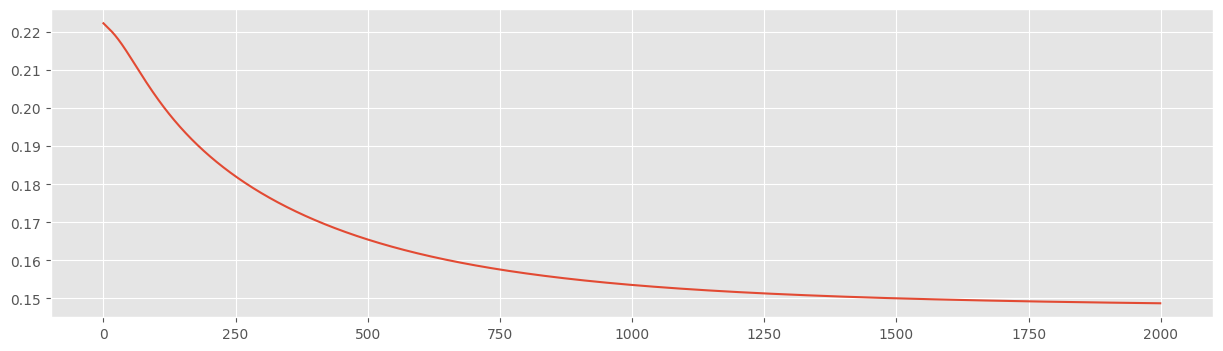

In [24]:
plt.plot(errors)

In [25]:
def fn_plot_decision_boundry(wts, X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm=0.01 # spacing of the grid width
    
    #Min and max along two axis
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    # generate a mesh grid
    xx,yy = np.meshgrid(np.arange(x_min, x_max, dm), # creates an array of x-cordinates y no of times
                       np.arange(y_min, y_max, dm)) # creates an array of y-cordinates x no of times
    # Together they create a mesh
    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack((XX, np.ones((XX.shape[0],1)))) # just added third column which wil nver be used because till now we had 3 rows so added this so that our code dont break
    y_pred=[]

    for row in XX:
        y_p = predict(row, wts)
        pred = 1 if y_p >= .5 else 0
        y_pred.append(pred)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha=0.8, cmap= plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors='k', cmap= CMAP)


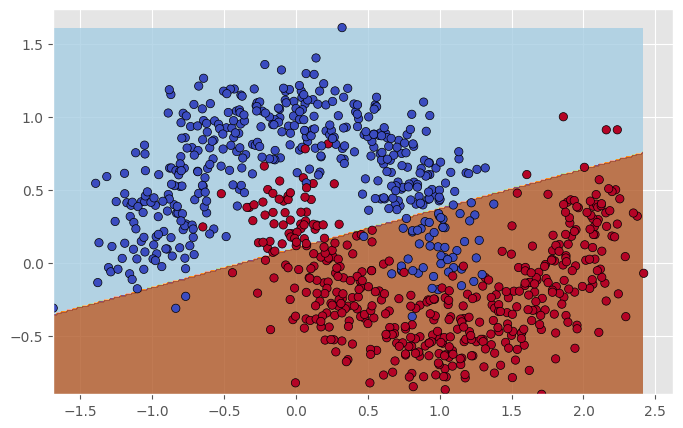

In [26]:
fn_plot_decision_boundry(weights, data_train)

In [27]:
preds= []
for row in data_train:
    a= predict(row, weights)
    y_pred=0
    if a>=0.5 : y_pred=1
    preds.append(y_pred)
accuracy_score(data_train[:,-1], preds)

0.8655555555555555

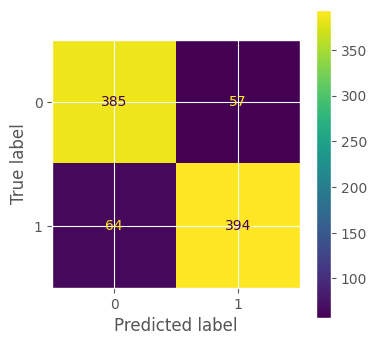

In [28]:
cm = confusion_matrix(data_train[:,-1], preds)
disp= ConfusionMatrixDisplay(cm, display_labels=[0,1])
fig, ax= plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
#Ugly part, bad part : subjective on case basis